In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["figure.figsize"] = (10,7)

SPLIT_ID = 'S9'
data_dir = fr'data\splits\{SPLIT_ID.lower()}'
FEATURE = 'HostService_64kHz_vibration_1'

In [2]:
x_train = np.load(f'{data_dir}/x_train_{FEATURE}.npy')
y_train = np.load(f'{data_dir}\y_train.npy', allow_pickle = True)

In [3]:
healthy_signal = x_train[0][:16000]
damaged_signal = x_train[-1][:16000]

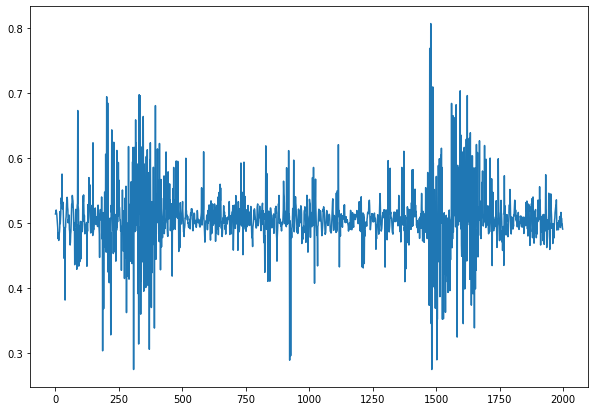

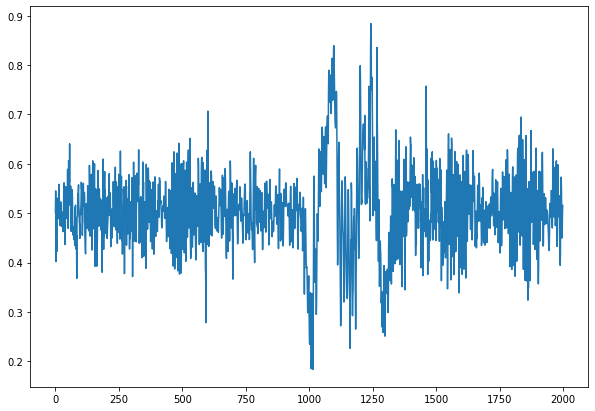

In [4]:
for signal in [healthy_signal, damaged_signal]:

    signal = signal[:2000]
    plt.plot(
        np.arange(signal.shape[0]),
        signal
    )
    plt.show()

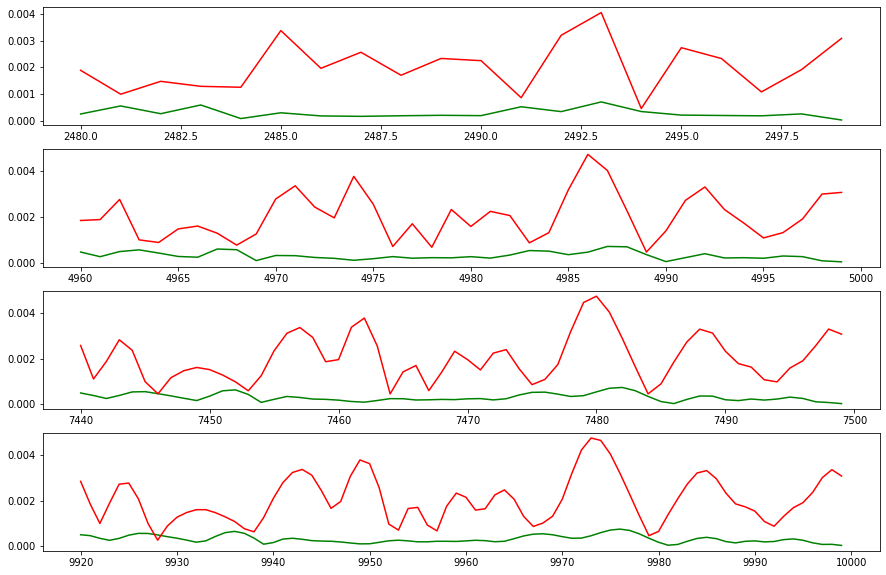

In [6]:
#TODO put in for

plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["figure.figsize"] = (15,10)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)
slice_idx1 = 2480
slice_idx2 = 2500

NUM_COEF_TO_SAVE = 12500

for zero_padding_multiple, ax in zip([1,2,3,4], [ax1, ax2, ax3, ax4]):

    healthy_signal_fft = (np.abs(np.fft.fft(
            healthy_signal, n = healthy_signal.shape[0] * zero_padding_multiple)
    ) / healthy_signal.shape[0])[1:NUM_COEF_TO_SAVE*zero_padding_multiple]

    damaged_signal_fft = (np.abs(np.fft.fft(
            damaged_signal, n = damaged_signal.shape[0] * zero_padding_multiple)
    ) / damaged_signal.shape[0])[1:NUM_COEF_TO_SAVE*zero_padding_multiple]

    color = 'green'
    for signal in [healthy_signal_fft, damaged_signal_fft]:
        ax.plot(
            np.arange(signal.shape[0])[slice_idx1*zero_padding_multiple:slice_idx2*zero_padding_multiple],
            signal[slice_idx1*zero_padding_multiple:slice_idx2*zero_padding_multiple],
            color = color
        )
        color = 'red'

plt.savefig(f'fft_zero_padding.png',
            bbox_inches='tight')
plt.show()